# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy
import math

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

[ 0. -1.]


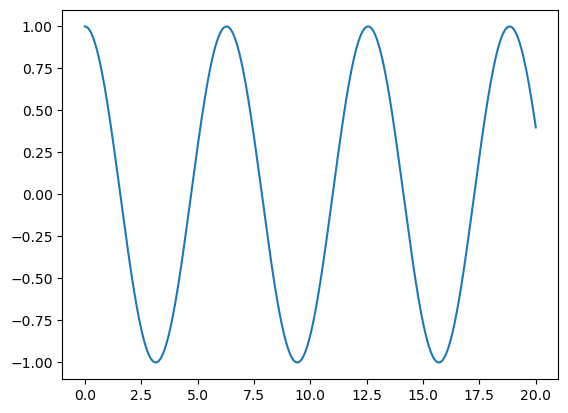

In [14]:
def f(t,y,K,M):
    yf = np.zeros(np.shape(y))
    yf[0] = y[1]
    yf[1] = -K/M*y[0]
    return yf

K=1
M=1
t0 = (0,20)
dt = 0.01
t = np.arange(t0[0],t0[1]+dt,dt)
y0 = np.array([1,0])
print(f(0,y0,K,M))

y = mysolver.solve_ivp(f,t0,y0,"RK4",t, args=(K,M) )
plt.plot(t,y[0])



In [2]:
# visualize the results




# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

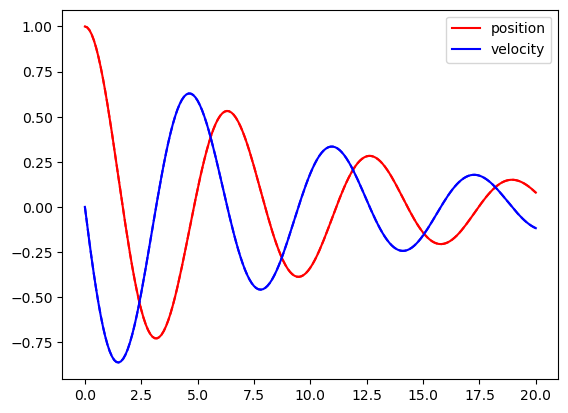

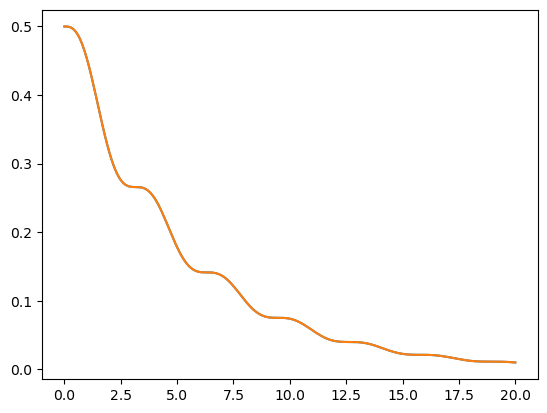

In [26]:
def f(t,y,K,M,l):
    yf = np.zeros(np.shape(y))
    yf[0] = y[1]
    yf[1] = -K/M*y[0]-l/M*y[1]
    return yf

K=1
M=1
l=0.2
t0 = (0,20)
dt = 0.1
t = np.arange(t0[0],t0[1]+dt,dt)
y0 = np.array([1,0])

y = mysolver.solve_ivp(f,t0,y0,"RK4",t, args=(K,M,l))
E = 0.5*K*y[0]**2+0.5*M*y[1]**2

# analytical solutions
gamma = l/2/M
omega = np.sqrt(K/M-gamma**2)
phi = math.atan(-gamma/omega)
A = 1/np.cos(phi)
x = A*np.exp(-gamma*t)*np.cos(omega*t+phi)
v = A*np.exp(-gamma*t)*(-gamma*np.cos(omega*t+phi)-omega*np.sin(omega*t+phi))
Ea = 0.5*K*x**2+0.5*M*v**2

plt.figure(1)
plt.plot(t,y[0],"r-", label = "position")
plt.plot(t,x,"r--")
plt.plot(t,y[1],"b-", label = "velocity")
plt.plot(t,v,"b--")
plt.legend()

plt.figure(2)
plt.plot(t,E)
plt.plot(t,Ea)


### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

Now, consider $x(0)=1, v(0)=0$:
$$
A\cos\phi=1 \\
-A(\gamma\cos\phi+\omega\sin\phi)=0
$$
thus, from second equation first:
$$
\tan\phi=-\gamma/\omega
$$

In [ ]:
# Compute the analytical solution







## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

In [4]:
# TODO








# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [5]:
# TODO







# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [6]:
# TODO







# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [ ]:
# TODO







# Performance

We could mesure the performance of our solver and compare it with scipy.

In [7]:
#TODO







Which one is faster?